In [485]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from itertools import combinations
from sklearn.dummy import DummyClassifier

import pandas as pd
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier  # simple neural net
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [486]:
df= pd.read_csv("HR_data.csv")

In [487]:
df

,Unnamed: 0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,0,77.965186,78.000,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1
1,1,70.981097,70.570,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1
2,2,73.371959,73.360,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1
3,3,78.916822,77.880,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1
4,4,77.322226,74.550,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,73.594539,72.380,9.474556,57.43,93.53,21482.985,round_4,phase2,14,0,8,D1_2
164,164,57.839897,54.130,6.796647,52.97,74.14,16825.740,round_4,phase1,14,0,0,D1_2
165,165,64.237295,65.195,3.589241,58.97,72.63,18691.065,round_1,phase3,14,0,1,D1_2
166,166,70.834320,70.440,2.391160,66.65,76.07,20753.005,round_1,phase2,14,0,4,D1_2


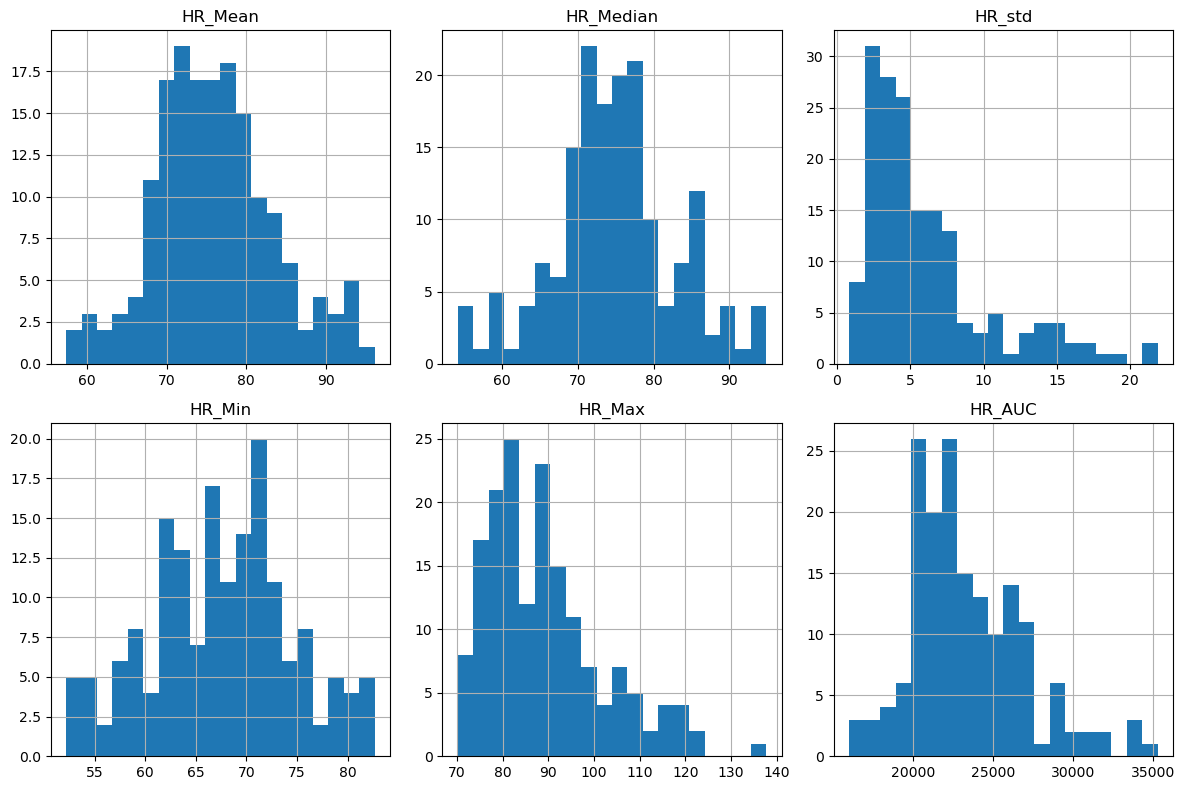

In [488]:
numerical_cols = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']

df[numerical_cols].hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()

In [489]:
df["HR_Max"]=np.log(df["HR_Max"])
df["HR_AUC"]=np.log(df["HR_AUC"])
df["HR_std"]=np.log(df["HR_std"])

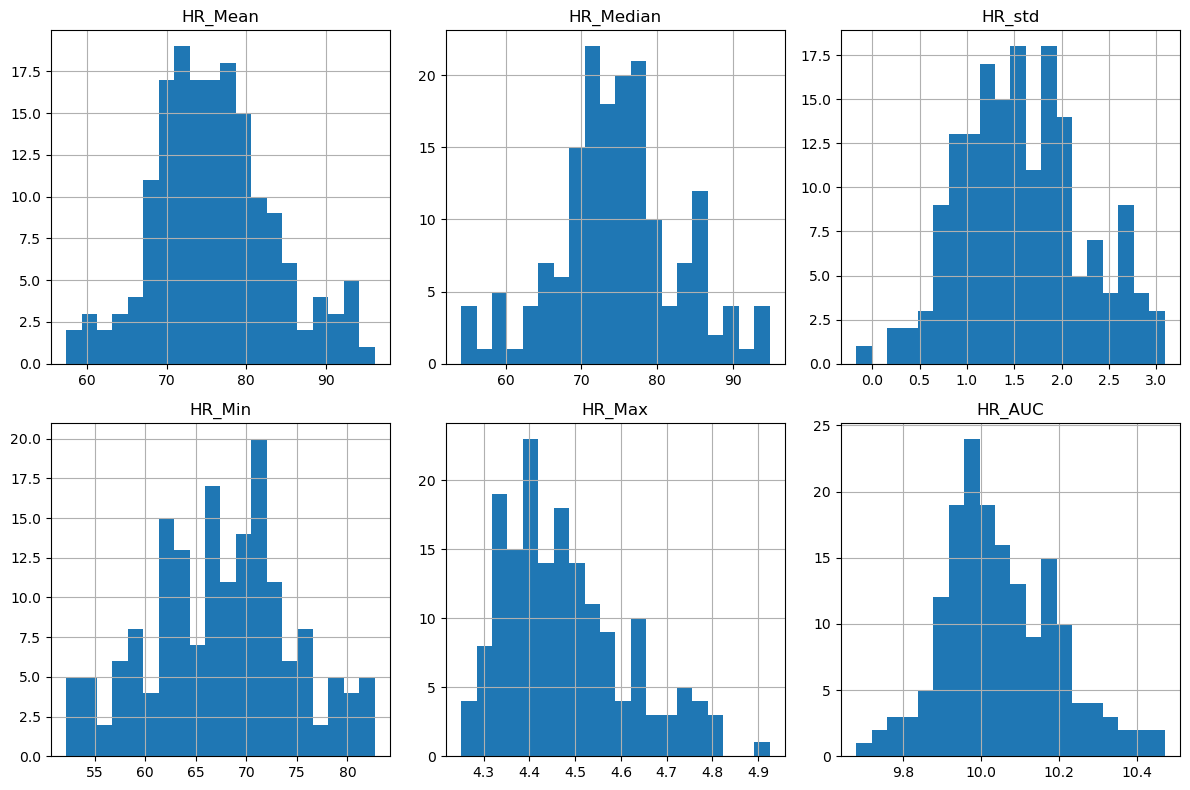

In [490]:
numerical_cols = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']

df[numerical_cols].hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()

In [491]:
def bin_frustration(val):
    if val <= 1:
        return 0  
    elif val <= 3:
        return 1  
    else:
        return 2  

df['Frustration_Class'] = df['Frustrated'].apply(bin_frustration)

X_cat = pd.get_dummies(df[['Round', 'Phase', 'Puzzler']], drop_first=True)
hr_features = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
X_hr = pd.DataFrame(StandardScaler().fit_transform(df[hr_features]), columns=hr_features)

X = pd.concat([X_hr, X_cat], axis=1)
y_binned = df['Frustration_Class']
groups = df['Individual']

X_hr

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC
0,0.261529,0.393515,-0.592147,0.827134,-0.417502,-0.063339
1,-0.672305,-0.526346,-1.034575,-0.043110,-0.888204,-0.364001
2,-0.352626,-0.180934,-0.632567,0.065136,-0.701826,-0.452148
3,0.388771,0.378658,-0.292721,0.697523,-0.281516,0.593908
4,0.175560,-0.033608,0.329823,0.441150,0.159674,0.216349
...,...,...,...,...,...,...
163,-0.322865,-0.302261,1.028878,-1.423252,0.431387,-0.503734
164,-2.429398,-2.561676,0.511641,-2.058487,-1.283661,-2.160195
165,-1.574010,-1.191790,-0.482547,-1.203910,-1.435562,-1.447478
166,-0.691930,-0.542440,-1.114980,-0.110052,-1.093952,-0.738085


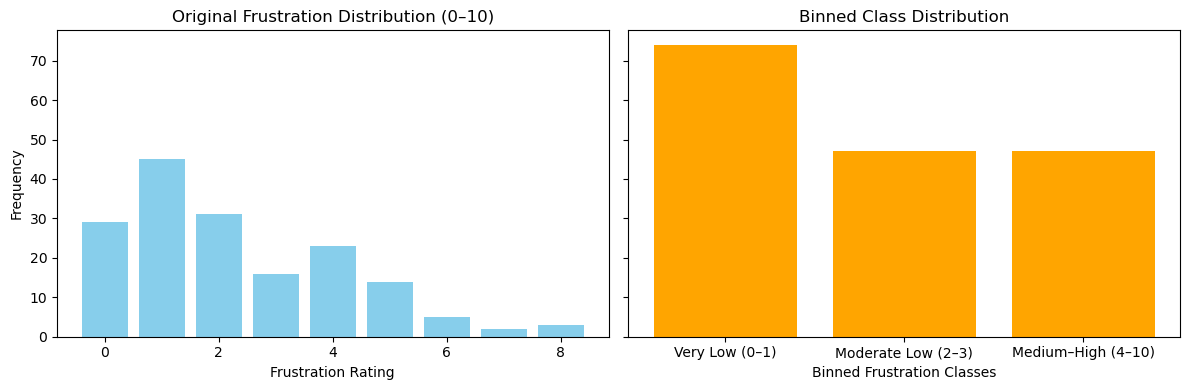

In [492]:
import matplotlib.pyplot as plt

original_counts = df['Frustrated'].value_counts().sort_index()
binned_counts = y_binned.value_counts().sort_index()


fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax[0].bar(original_counts.index, original_counts.values, color='skyblue')
ax[0].set_title('Original Frustration Distribution (0–10)')
ax[0].set_xlabel('Frustration Rating')
ax[0].set_ylabel('Frequency')

bin_labels = ['Very Low (0–1)', 'Moderate Low (2–3)', 'Medium–High (4–10)']
ax[1].bar(binned_counts.index, binned_counts.values, color='orange', tick_label=bin_labels)
ax[1].set_title('Binned Class Distribution')
ax[1].set_xlabel('Binned Frustration Classes')

plt.tight_layout()
plt.show()


In [493]:
# One-hot encode round, phase, and puzzler
X_cat = pd.get_dummies(df[['Round', 'Phase', 'Puzzler']], drop_first=True)
hr_features = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
scaler = StandardScaler()
X_hr = pd.DataFrame(scaler.fit_transform(df[hr_features]), columns=hr_features)

X = pd.concat([X_hr, X_cat], axis=1)
y = df['Frustrated']  # or y_binned if you later discretize it
groups = df['Individual']



## OPTION 2

In [494]:
labels = [0, 1, 2]
columns = ['F1_Low', 'F1_Med', 'F1_High', 'F1_Macro']

mlp_model = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=0)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=3, min_samples_leaf=4, random_state=0)
dummy_model = DummyClassifier(strategy="most_frequent")
cv = StratifiedGroupKFold(n_splits=10)

results = {
    'MLP': {'train': [], 'test': []},
    'RF': {'train': [], 'test': []},
    'Dummy': {'train': [], 'test': []}
}

for train_idx, test_idx in cv.split(X, y_binned, groups=groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_binned.iloc[train_idx], y_binned.iloc[test_idx]

    # MLP 
    mlp_model.fit(X_train, y_train)
    y_pred_train = mlp_model.predict(X_train)
    y_pred_test = mlp_model.predict(X_test)
    f1_train = f1_score(y_train, y_pred_train, average=None, labels=labels, zero_division=0)
    f1_test = f1_score(y_test, y_pred_test, average=None, labels=labels, zero_division=0)
    f1_train_macro = f1_score(y_train, y_pred_train, average='macro', zero_division=0)
    f1_test_macro = f1_score(y_test, y_pred_test, average='macro', zero_division=0)
    results['MLP']['train'].append(list(f1_train) + [f1_train_macro])
    results['MLP']['test'].append(list(f1_test) + [f1_test_macro])

    # Random Forest
    rf_model.fit(X_train, y_train)
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)
    f1_train = f1_score(y_train, y_pred_train, average=None, labels=labels, zero_division=0)
    f1_test = f1_score(y_test, y_pred_test, average=None, labels=labels, zero_division=0)
    f1_train_macro = f1_score(y_train, y_pred_train, average='macro', zero_division=0)
    f1_test_macro = f1_score(y_test, y_pred_test, average='macro', zero_division=0)
    results['RF']['train'].append(list(f1_train) + [f1_train_macro])
    results['RF']['test'].append(list(f1_test) + [f1_test_macro])

    # Dummy
    dummy_model.fit(X_train, y_train)
    y_pred_train = dummy_model.predict(X_train)
    y_pred_test = dummy_model.predict(X_test)
    f1_train_macro = f1_score(y_train, y_pred_train, average='macro', zero_division=0)
    f1_test_macro = f1_score(y_test, y_pred_test, average='macro', zero_division=0)
    results['Dummy']['train'].append([None, None, None, f1_train_macro])
    results['Dummy']['test'].append([None, None, None, f1_test_macro])

df_mlp_train = pd.DataFrame(results['MLP']['train'], columns=[col + " (Train MLP)" for col in columns])
df_mlp_test = pd.DataFrame(results['MLP']['test'], columns=[col + " (Test MLP)" for col in columns])
df_rf_train = pd.DataFrame(results['RF']['train'], columns=[col + " (Train RF)" for col in columns])
df_rf_test = pd.DataFrame(results['RF']['test'], columns=[col + " (Test RF)" for col in columns])
df_dummy_test = pd.DataFrame(results['Dummy']['test'], columns=[col + " (Test Dummy)" for col in columns])
df_dummy_train = pd.DataFrame(results['Dummy']['train'], columns=[col + " (Train Dummy)" for col in columns])

df_combined = pd.concat([df_mlp_train, df_mlp_test, df_rf_train, df_rf_test, df_dummy_test,df_dummy_train], axis=1)


/opt/homebrew/Caskroom/miniconda/base/envs/IntelligentSystems/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/IntelligentSystems/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [495]:
df_combined

,F1_Low (Train MLP),F1_Med (Train MLP),F1_High (Train MLP),F1_Macro (Train MLP),F1_Low (Test MLP),F1_Med (Test MLP),F1_High (Test MLP),F1_Macro (Test MLP),F1_Low (Train RF),F1_Med (Train RF),...,F1_High (Test RF),F1_Macro (Test RF),F1_Low (Test Dummy),F1_Med (Test Dummy),F1_High (Test Dummy),F1_Macro (Test Dummy),F1_Low (Train Dummy),F1_Med (Train Dummy),F1_High (Train Dummy),F1_Macro (Train Dummy)
0,0.713376,0.166667,0.674699,0.518247,0.620690,0.285714,0.333333,0.413246,0.718954,0.350877,...,0.333333,0.413246,None,None,None,0.234234,None,None,None,0.198374
1,0.683544,0.363636,0.636364,0.561181,0.800000,0.000000,0.571429,0.457143,0.730769,0.552632,...,0.666667,0.513889,None,None,None,0.428571,None,None,None,0.196078
2,0.699301,0.461538,0.625000,0.595280,0.560000,0.153846,0.800000,0.504615,0.732394,0.515152,...,0.888889,0.527066,None,None,None,0.256410,None,None,None,0.193760
3,0.695652,0.369231,0.627907,0.564263,0.875000,0.000000,0.857143,0.577381,0.719512,0.434783,...,0.857143,0.577381,None,None,None,0.266667,None,None,None,0.198198
4,0.729282,0.327273,0.552632,0.536395,0.000000,0.000000,0.500000,0.166667,0.764045,0.456140,...,0.571429,0.264550,None,None,None,0.000000,None,None,None,0.214493
5,0.687117,0.363636,0.626506,0.559086,0.933333,0.000000,0.888889,0.911111,0.728395,0.506667,...,0.888889,0.582011,None,None,None,0.368421,None,None,None,0.200299
6,0.695652,0.377358,0.567568,0.546859,0.608696,0.153846,0.500000,0.420847,0.745342,0.500000,...,0.444444,0.459259,None,None,None,0.166667,None,None,None,0.209524
7,0.715232,0.370370,0.674699,0.586767,0.720000,0.181818,0.333333,0.411717,0.729560,0.461538,...,0.333333,0.358025,None,None,None,0.196078,None,None,None,0.205128
8,0.725146,0.296296,0.666667,0.562703,0.200000,0.250000,0.666667,0.372222,0.745763,0.377358,...,0.666667,0.444444,None,None,None,0.051282,None,None,None,0.212518
9,0.734940,0.412698,0.626506,0.591381,0.200000,0.000000,0.666667,0.288889,0.745562,0.461538,...,0.285714,0.206349,None,None,None,0.133333,None,None,None,0.208517


In [496]:

df_combined["F1_Macro (Test MLP)"].mean(),df_combined["F1_Macro (Test RF)"].mean()


(0.45238382814919537, 0.4346219574380494)

In [497]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

f1_train_cols = [col for col in df_combined.columns if "Train" in col and "F1_" in col]
f1_test_cols = [col for col in df_combined.columns if "Test" in col and "F1_" in col and "Macro" not in col]
f1_macro_cols = [col for col in df_combined.columns if "F1_Macro" in col and "Test" in col]

train_f1 = df_combined[f1_train_cols].copy()
test_f1 = df_combined[f1_test_cols].copy()
macro_f1 = df_combined[f1_macro_cols].copy()

train_f1.columns = [col.replace("F1_", "").replace("Train ", "") for col in train_f1.columns]
test_f1.columns = [col.replace("F1_", "").replace("Test ", "") for col in test_f1.columns]
macro_f1.columns = [col.replace("F1_Macro (Test ", "").replace(")", "") for col in macro_f1.columns]


macro_f1["MLP"].std()
macro_f1["RF"].std()


0.12692648259314565

In [498]:

train_f1 = train_f1.drop(columns=[col for col in train_f1.columns if "Dummy" in col and col != "Macro (Dummy)"])
test_f1 = test_f1.drop(columns=[col for col in test_f1.columns if "Dummy" in col and col != "Macro (Dummy)"])


In [ ]:
from scipy.stats import wilcoxon
mlp_macro = macro_f1["MLP"]
rf_macro = macro_f1["RF"]

stat, p_value = wilcoxon(mlp_macro, rf_macro)

(stat, p_value)

(17.0, 0.8886378608950078)

In [ ]:
mlp_macro = macro_f1["MLP"]
dummy_macro = macro_f1["Dummy"]

stat, p_value = wilcoxon(mlp_macro, dummy_macro)

(stat, p_value)


(0.0, 0.001953125)

In [ ]:
mlp_macro = macro_f1["RF"]
dummy_macro = macro_f1["Dummy"]
stat, p_value = wilcoxon(mlp_macro, dummy_macro)

(stat, p_value)

(0.0, 0.001953125)